In [22]:
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
spark1=pd.read_csv("spark1.csv")

# Data Visulization

In [8]:
spark1.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [9]:
spark1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


Its quite a small dataset with 1 feature and 25 different values

In [10]:
spark1.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Lets plot our data with matplotlib scatter plot

Text(0, 0.5, 'Scores')

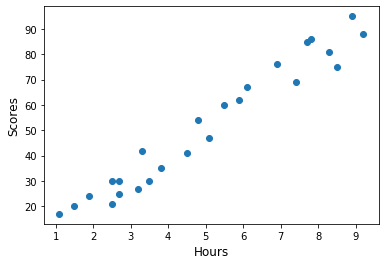

In [19]:
plt.scatter(spark1["Hours"],spark1["Scores"])
plt.xlabel("Hours",fontsize=12)
plt.ylabel("Scores",fontsize=12)


Our dataset seems to follow a linear relationship

# Train/Test Split And Linear Regression Model

Let first change data into arrays (Remember Ml models expect 2D feature arrays,sparkhours is 1D array we will use reshape to convert it into 2D )

In [27]:
sparkhours=spark1["Hours"].values.reshape(-1,1)

In [28]:
sparkscores=spark1["Scores"].values

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(sparkhours,sparkscores,train_size=0.80,random_state=42)


In [30]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression()

# Using R2 Score to check the model accuracy

In [34]:
from sklearn.metrics import r2_score
y_pred=lin_reg.predict(x_test)
spark1_r2_score=r2_score(y_test,y_pred)

In [35]:
spark1_r2_score

0.9678055545167994

Wow!Our model perform verywell with 96% accuracy

Lets plot those predictions

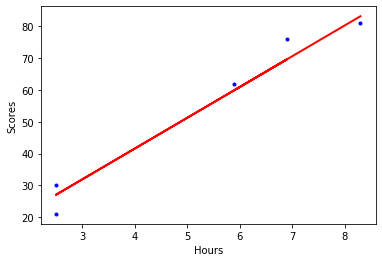

In [38]:
plt.plot(x_test, y_pred, "r-", linewidth=2)
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.plot(x_test, y_test, "b.")
plt.show()

Lets do some random tasks lets see what will be the score if student studies 9.25 hours/day

In [42]:
spark1_random=np.array(9.25)
spark1_random=spark1_random.reshape(-1,1)

In [44]:
spark1_random_score=lin_reg.predict(spark1_random)
spark1_random_score

array([92.38611528])

Our student gonna score 92.38 Marks